# Lecture 05

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# sns.set_style('whitegrid')
sns.set_palette('tab10')

- Biến phân loại hoạt động tốt đối với mô hình dạng logic ( decision tree)
- lý thuyết về Correlation chỉ đúng với các mô hình dạng phương trình, dạng linear
- Tham khảo thêm lý thuyết lọc biến bằng phương pháp RFE ( Recursive Feature Elimination)
- Phương pháp PCA để giảm số lượng biến 

## Tree Model

### Decision Tree basics

In [3]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris_df = iris['frame']
display(iris_df.info(), iris_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


None

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


![](https://www.researchgate.net/profile/Wolfgang-Engelmann/publication/265877256/figure/fig3/AS:669555605114885@1536645904238/Flower-of-a-plant-with-peduncle-a-calyx-consisting-of-sepals-petals-stamen-and-in.png)

<AxesSubplot:xlabel='target', ylabel='count'>

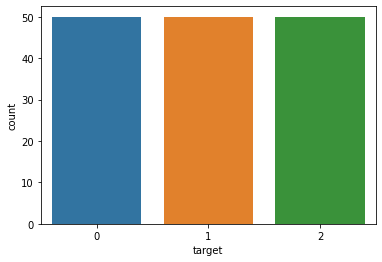

In [5]:
sns.countplot(data=iris_df, x='target', palette='tab10')

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

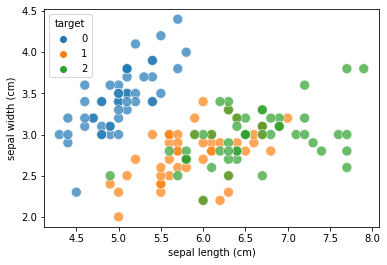

In [6]:
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', s=100, alpha=0.7, palette='tab10')

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

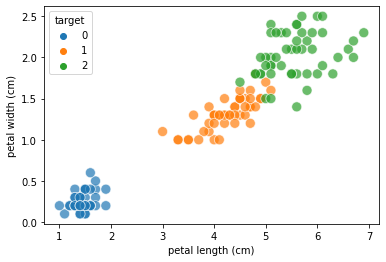

In [7]:
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='target', s=100, alpha=0.7, palette='tab10')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [10]:
X, y = iris_df[["petal length (cm)", "petal width (cm)"]], iris_df["target"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    stratify = y , # chia đều theo phân phối để đảm bảo cân bằng giữa các nhãn
                                                    #ramdom_stage = 56, 
                                                   )

In [12]:
y_test.value_counts()

0    15
1    15
2    15
Name: target, dtype: int64

In [13]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = tree.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  97.77777777777777


In [15]:
display(
    metrics.f1_score(y_test, y_pred, average='weighted'), 
    metrics.precision_score(y_test, y_pred, average='weighted'), 
    metrics.recall_score(y_test, y_pred, average='weighted')
)

0.9777530589543938

0.9791666666666666

0.9777777777777777

## code mẫu

In [16]:
X, y = iris_df[['sepal length (cm)', 'sepal width (cm)']], iris_df['target']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    stratify = y)

In [18]:
y_test.value_counts()

0    15
1    15
2    15
Name: target, dtype: int64

In [19]:
tree = DecisionTreeClassifier(
    max_depth = 5, # giới hạn số tầng của cây
    max_features = 2 # giới hạn số biến dùng để xây cây
)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=2)

In [20]:
y_pred = tree.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  71.11111111111111


In [21]:
display(
    metrics.f1_score(y_test, y_pred, average='weighted'), 
    metrics.precision_score(y_test, y_pred, average='weighted'), 
    metrics.recall_score(y_test, y_pred, average='weighted')
)

0.7143354729561625

0.7236467236467238

0.7111111111111111

In [22]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

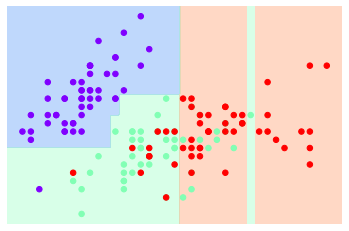

In [23]:
visualize_classifier(tree, X, y)

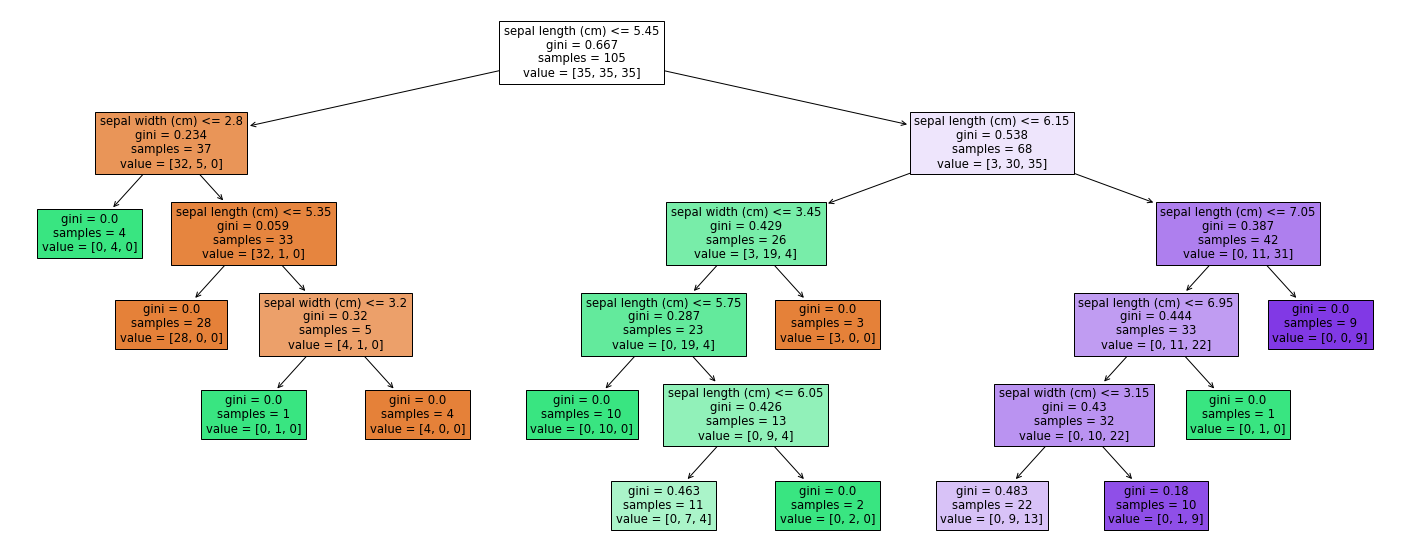

In [24]:
plt.figure(figsize=(25, 10))
_ = plot_tree(tree, feature_names=x_train.columns, max_depth=5, filled=True)

In [25]:
tree.feature_importances_

array([0.72999228, 0.27000772])

## ví dụ cân cá:
- Làm thế nào để đo được trung bình cân nặng của mỗi con cá của cả ao cá:
- Đo tệp con, Giá trị trung bình của các tệp con sẽ tiệm cận giá trị trung bình của toàn bộ phân phối 

### Random Forest

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
forest = RandomForestClassifier(
    # nhận các tham số như Decisin tree
    #max_features,
    #max_depth,
    #n_estimators # giới hạn số lượng cây trong forest, mặc định bằng 100
    random_state = 5
    #maxaxss_sample samplee= 0.8
)

forest.fit(x_train, y_train)


RandomForestClassifier(random_state=5)

In [28]:
print(len(forest.estimators_))
forest.estimators_[:5]

100


[DecisionTreeClassifier(max_features='auto', random_state=953453411),
 DecisionTreeClassifier(max_features='auto', random_state=236996814),
 DecisionTreeClassifier(max_features='auto', random_state=1592283119),
 DecisionTreeClassifier(max_features='auto', random_state=1423042237),
 DecisionTreeClassifier(max_features='auto', random_state=887852006)]

In [29]:
y_pred = forest.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  66.66666666666666


In [30]:
display(
    metrics.f1_score(y_test, y_pred, average='weighted'), 
    metrics.precision_score(y_test, y_pred, average='weighted'), 
    metrics.recall_score(y_test, y_pred, average='weighted')
)

0.6703239289446187

0.6794871794871795

0.6666666666666666

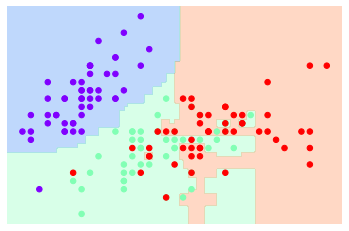

In [31]:
visualize_classifier(forest, X, y)

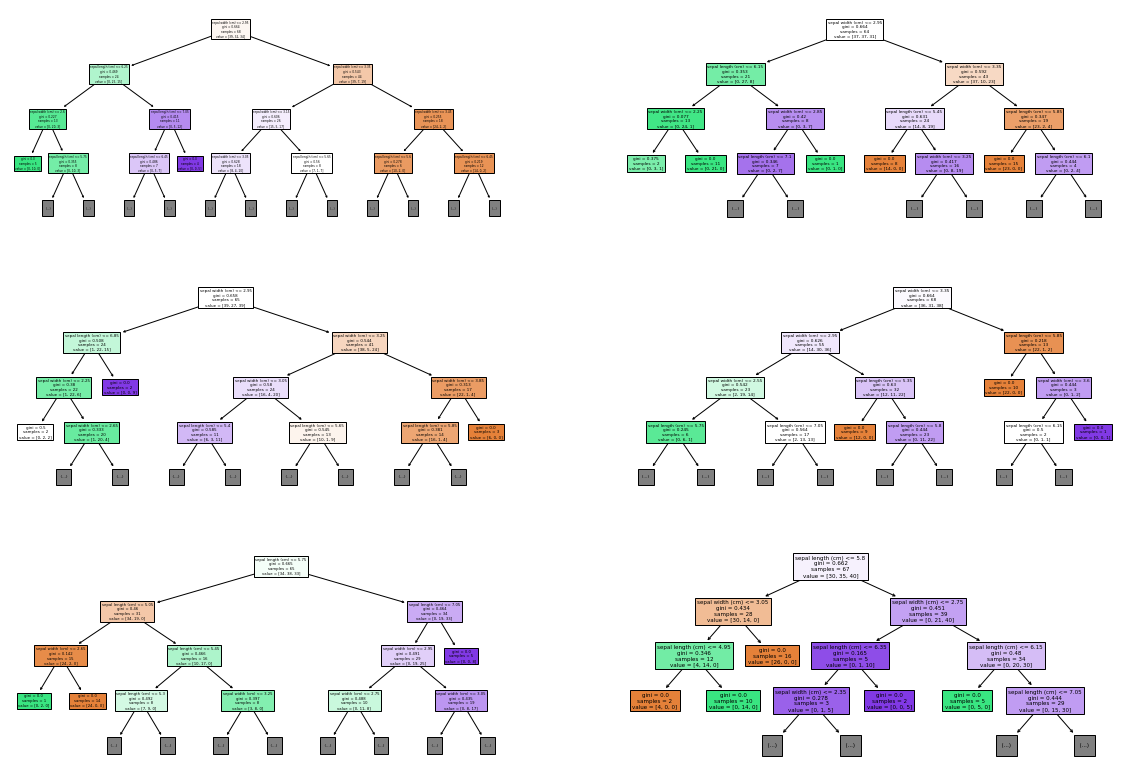

In [32]:
fig, axs = plt.subplots(3, 2, figsize=(20, 14))

for tree, ax in zip(forest.estimators_[:6], axs.ravel()):
    plot_tree(tree, feature_names=iris_df.columns, max_depth=3, filled=True, ax=ax)

## Câu hỏi thảo luận:
1. Khi xây dựng mô hình random forest hãy suy nghĩ về những câu hỏi sau:
- Bao nhiêu cây là đủ: tối thiểu = total feature - max features +1)
    - Tối ưu: Tổ hợp chập (max_feature) của (total_features)
- Bao nhiêu tầng là đủ: max depth
    - số lượng biến: 2^0 +2^1+2^2+... Nếu số lượng biến lớn hơn max_features mình set thì sẽ sử dụng lại biến
    - Thường theo log2 của số lượng biến sử dụng và lựa chọn thêm 1 hệ số để điều chỉnh 1 biến có được lặp lại trên nhiều lớp hay không
- Bao nhiêu biến là đủ: đối với bài toàn nhiều biến = căn 2 của số lượng biến
    - Thông thường không nên sử dụng dưới 15 ( tương ứng với 4 tầng cây)
    - Tuy nhiên thực tế cần cân bằng giữa max_feature và n_estimator và khả năng tính toán của hê thống
2. Bài tập thực hành 
- Hãy biến đổi dữ liệu iris thành bài toàn binary (0-1) : Gộp nhãn thành 2 nhóm
- Xây dựng mô hình logistic cho dữ liệu iris
- So sánh với kết quả của mô hình cây / rừng

<AxesSubplot:xlabel='target', ylabel='count'>

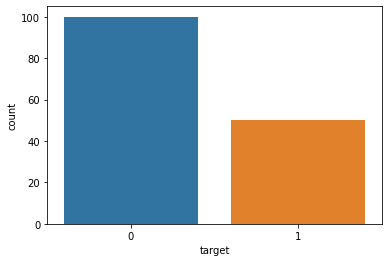

In [33]:
y_binary = y.eq(1).astype(int)
sns.countplot(x=y_binary)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y_binary, test_size = 0.3,
                                                    stratify = y_binary, 
                                                    random_state = 30)

In [43]:
from sklearn.linear_model import LogisticRegression

In [45]:
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [47]:
y_pred = logit_model.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  73.33333333333333


In [48]:
display(
    metrics.f1_score(y_test, y_pred, average = "weighted"),
    metrics.precision_score(y_test, y_pred, average = "weighted"),
    metrics.recall_score(y_test, y_pred, average = "weighted")
)

0.7121212121212122

0.7222222222222222

0.7333333333333333

In [68]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# StandardScaler: lấy z_score toàn bộ dữ liệu theo độ lệch chuẩn
# RobustScaler: lấy zscore toàn bộ dữ liệu theo IQR( 25%-75%)

# StandardScaler

In [60]:
X = iris_df.drop(columns = "target")
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X, y_binary, test_size = 0.3,
                                                    stratify = y_binary, 
                                                    random_state = 30)
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)


Accuracy score:  75.55555555555556


In [69]:
display(
    metrics.f1_score(y_test, y_pred, average = "weighted"),
    metrics.precision_score(y_test, y_pred, average = "weighted"),
    metrics.recall_score(y_test, y_pred, average = "weighted")
)

0.7405128205128204

0.7476190476190475

0.7555555555555555

# RobustScaler

In [65]:
scaler = RobustScaler()
X_scale = scaler.fit_transform(X)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y_binary, test_size = 0.3,
                                                    stratify = y_binary, 
                                                    random_state = 30)
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)


Accuracy score:  75.55555555555556


In [67]:
display(
    metrics.f1_score(y_test, y_pred, average = "weighted"),
    metrics.precision_score(y_test, y_pred, average = "weighted"),
    metrics.recall_score(y_test, y_pred, average = "weighted")
)

0.7405128205128204

0.7476190476190475

0.7555555555555555

## Support Vector Machines

<AxesSubplot:xlabel='target', ylabel='count'>

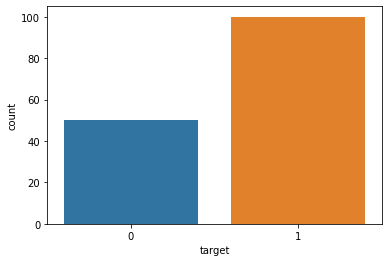

In [70]:
y_binary = y.gt(0).astype(int) 
# gt = greater than = lớn hơn
# ge = >= 
# eq : =
# ne  : !=
# lt: <
# le : <=
# cách viết tiêu chuẩn của pyspark
# (+/-/*/:) nên sử dụng hàm pandas. Ví dụ  arr1 + 1 = arr.add(1) |  (arr1+1)/10 = arr.add(1).div(10)
sns.countplot(x=y_binary)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

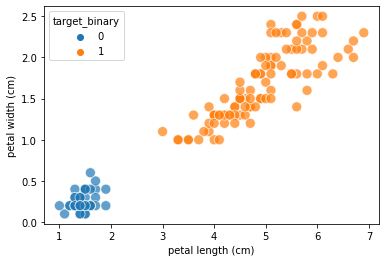

In [71]:
iris_df['target_binary'] = y_binary
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')

In [73]:
X, y = iris_df[['petal length (cm)', 'petal width (cm)']], iris_df['target_binary']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 420)

In [76]:
from sklearn.svm import SVC # Support Vector Classifier

svc = SVC(kernel='linear') # C = 1.0 # innitializing model 
# kernel = 'linear' chia khối dữ liệu bằng đường thẳng
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [78]:
y_pred = svc.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  100.0


In [131]:
# Decision Tree va Random Forest cho ket qua bao nhieu?

In [79]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolor='none', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

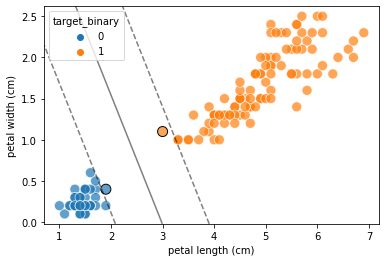

In [80]:
ax = sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

In [83]:
display(
    svc.decision_function(x_test),
    svc.predict(x_test)
)

array([ 2.72000003,  4.64000003,  5.45000003, -1.70999997, -1.48999997,
        1.93000003, -1.48999997,  2.40000003,  3.26000003,  2.76000003,
        4.13000003,  2.72000003, -2.03999997, -1.37999997,  4.24000003,
        1.85000003, -1.70999997, -1.52999997, -1.37999997, -1.37999997,
       -1.26999997,  4.05000003,  2.03000003, -1.66999997,  2.83000003,
        3.01000003, -1.48999997, -1.59999997,  1.49000003,  2.69000003,
        1.05000003,  3.37000003,  4.46000003, -1.59999997, -1.52999997,
        2.72000003,  4.56000003,  1.59000003])

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [84]:
svc.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

### Beyond linear boundaries: Kernel SVM

<AxesSubplot:xlabel='target', ylabel='count'>

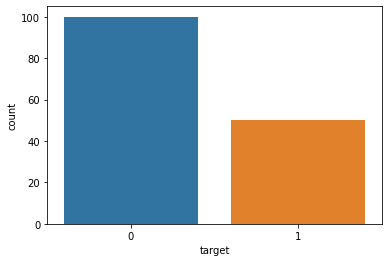

In [89]:
y_binary = iris_df["target"].gt(1).astype(int)
sns.countplot(x=y_binary)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

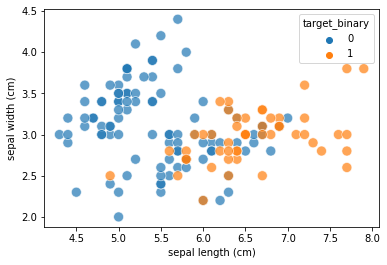

In [90]:
iris_df['target_binary'] = y_binary
sns.scatterplot(data=iris_df, 
                x='sepal length (cm)', 
                y='sepal width (cm)', 
                hue='target_binary', 
                s=100, 
                alpha=0.7, 
                palette='tab10')

In [92]:
X, y = iris_df[['sepal length (cm)', 'sepal width (cm)']], iris_df['target_binary']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 420)

In [93]:
svc = SVC(kernel='linear') # C = 1.0
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [95]:
y_pred = svc.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  86.8421052631579


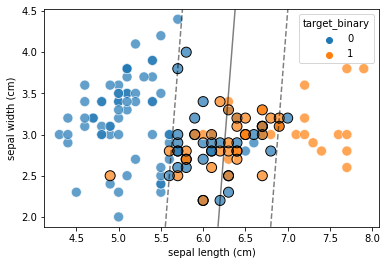

In [96]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

In [97]:
svc = SVC(kernel='rbf') # C = 1.0
# rbf là thông số mặc định của svc
svc.fit(x_train, y_train)

SVC()

In [99]:
y_pred = svc.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  81.57894736842105


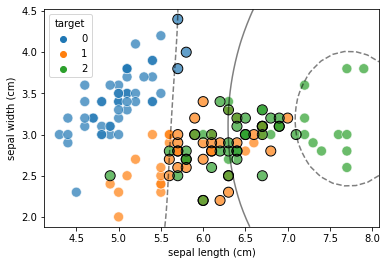

In [100]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

### Tuning the SVM: Softening Margins

In [110]:
svc = SVC(kernel='rbf', C=0.5) # C = 100.0 tham số quyết định bao nhiêu điểm được nằm tại đường biên thường là lũy thừa của 10
svc.fit(x_train, y_train)

SVC(C=0.5)

In [111]:
y_pred = svc.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  84.21052631578947


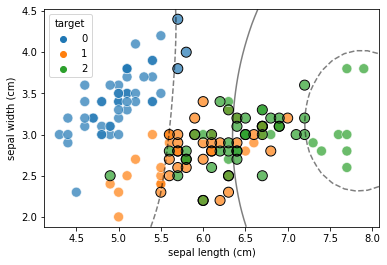

In [112]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

## Regularization Linear Model

## Model Validation & Cross Validation

In [232]:
from sklearn.model_selection import train_test_split, KFold

In [234]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
tree = DecisionTree()